# Titanic Project
Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Note: You can find the dataset in the link below.
Downlaod Files:
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis


In [5]:
df.shape

(891, 12)

In [6]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Checking null values in the dataframe
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

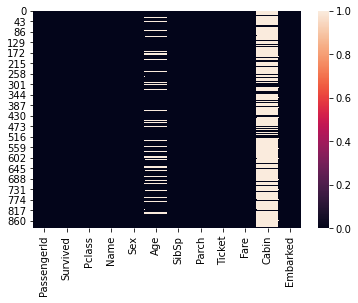

In [9]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

Here we can see data missing in Age and Cabin columns

In [10]:

# Checking how many columns are there in the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [12]:
# Defining skewed columns 
features = ["Survived","Pclass","Age","SibSp","Parch","Fare"]

# Important Features ploting


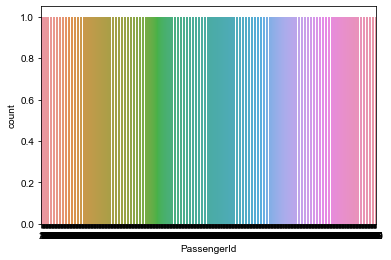

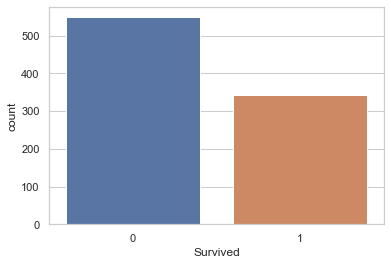

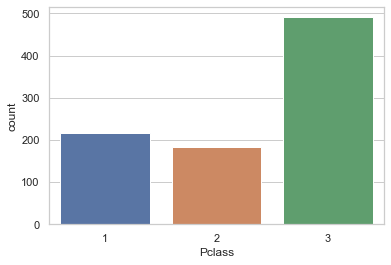

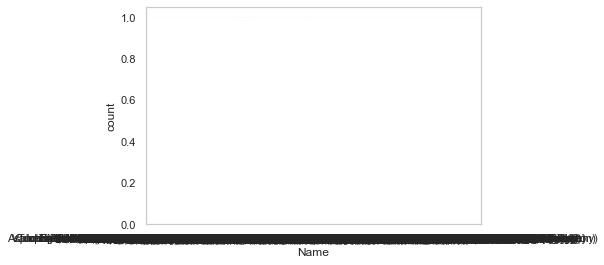

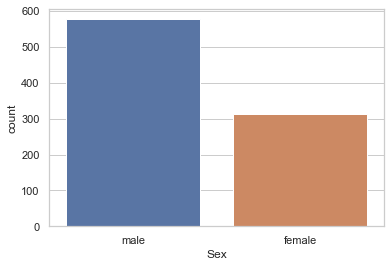

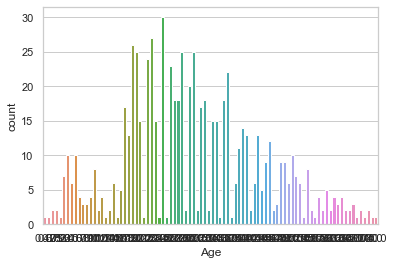

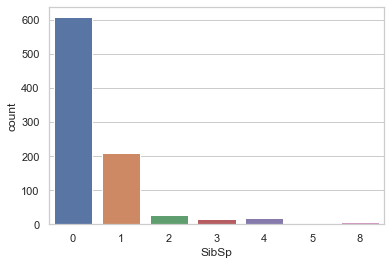

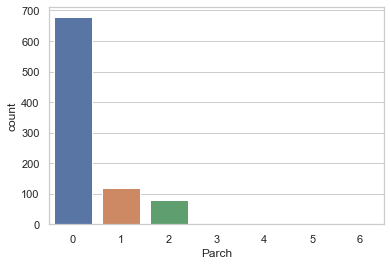

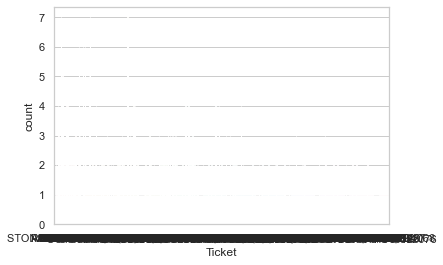

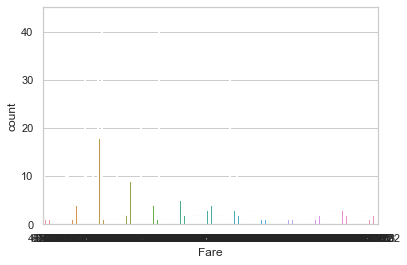

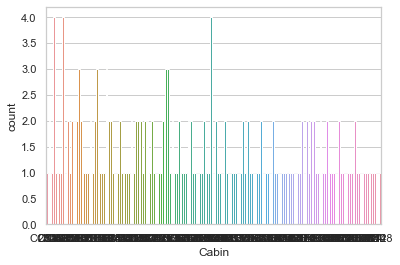

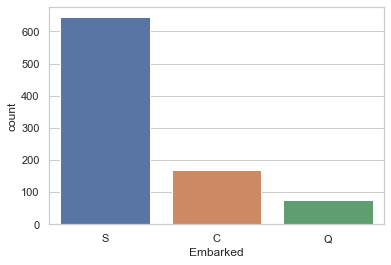

In [13]:
for i in df.columns:
    plt.figure()
    sns.countplot(df[i])
    sns.set(style='whitegrid')

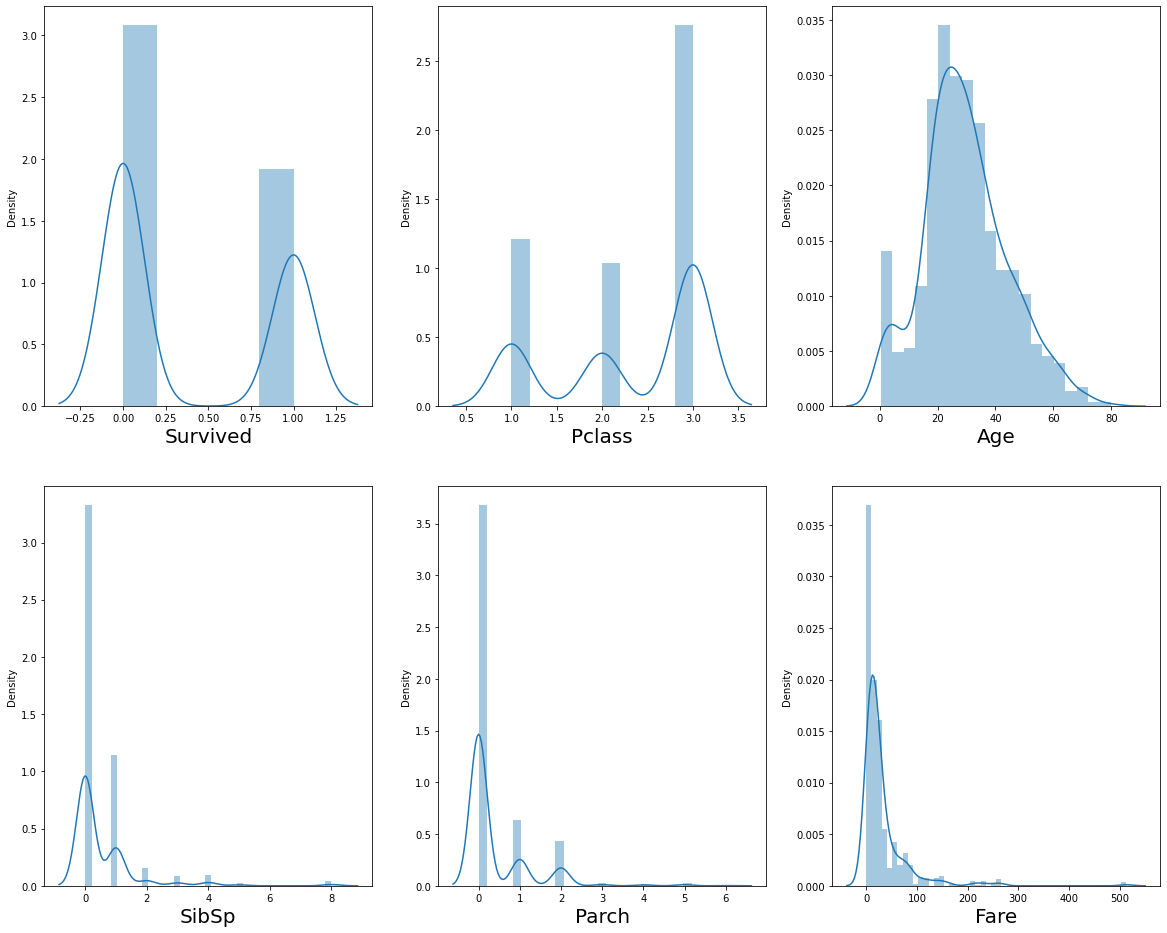

In [13]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
column=1
for column in df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

On observing the info PassengerId,Name,Ticket,Cabin not useful features, so we will drop them.

In [14]:
df.drop(['PassengerId', 'Name','Ticket','Cabin'], axis=1, inplace=True)

In [15]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
df.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [17]:
#Treating null values in Age column using median
df["Age"]=df["Age"].fillna(df["Age"].median())

In [18]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in df.columns:
    df[i]=lb.fit_transform(df[i])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,51,1,0,207,0
2,1,2,0,34,0,0,41,2
3,1,0,0,47,1,0,189,2
4,0,2,1,47,0,0,43,2
...,...,...,...,...,...,...,...,...
886,0,1,1,35,0,0,85,2
887,1,0,0,24,0,0,153,2
888,0,2,0,36,1,2,131,2
889,1,0,1,34,0,0,153,0


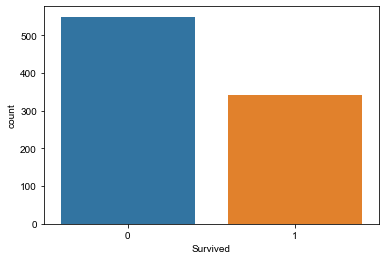

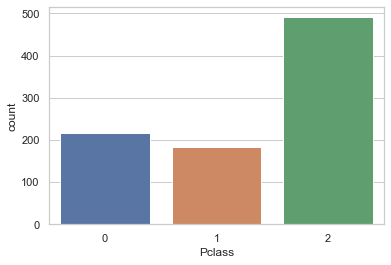

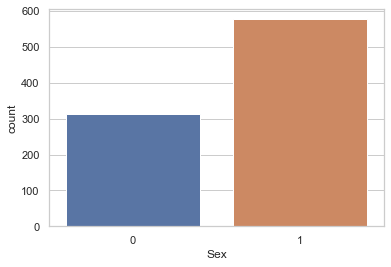

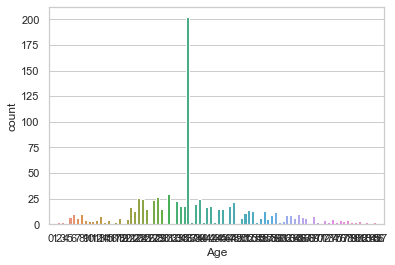

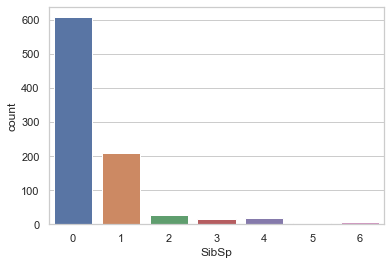

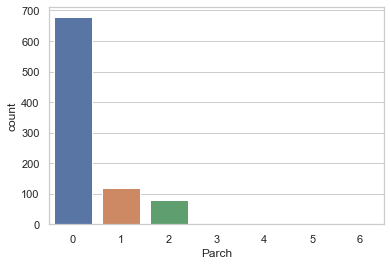

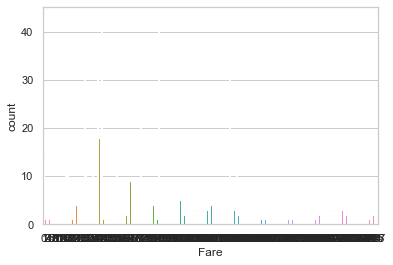

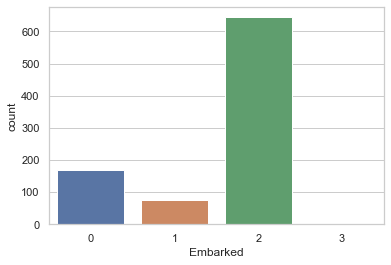

In [20]:
for i in df.columns:
    plt.figure()
    sns.countplot(df[i])
    sns.set(style='whitegrid')

# Identifying the outliers


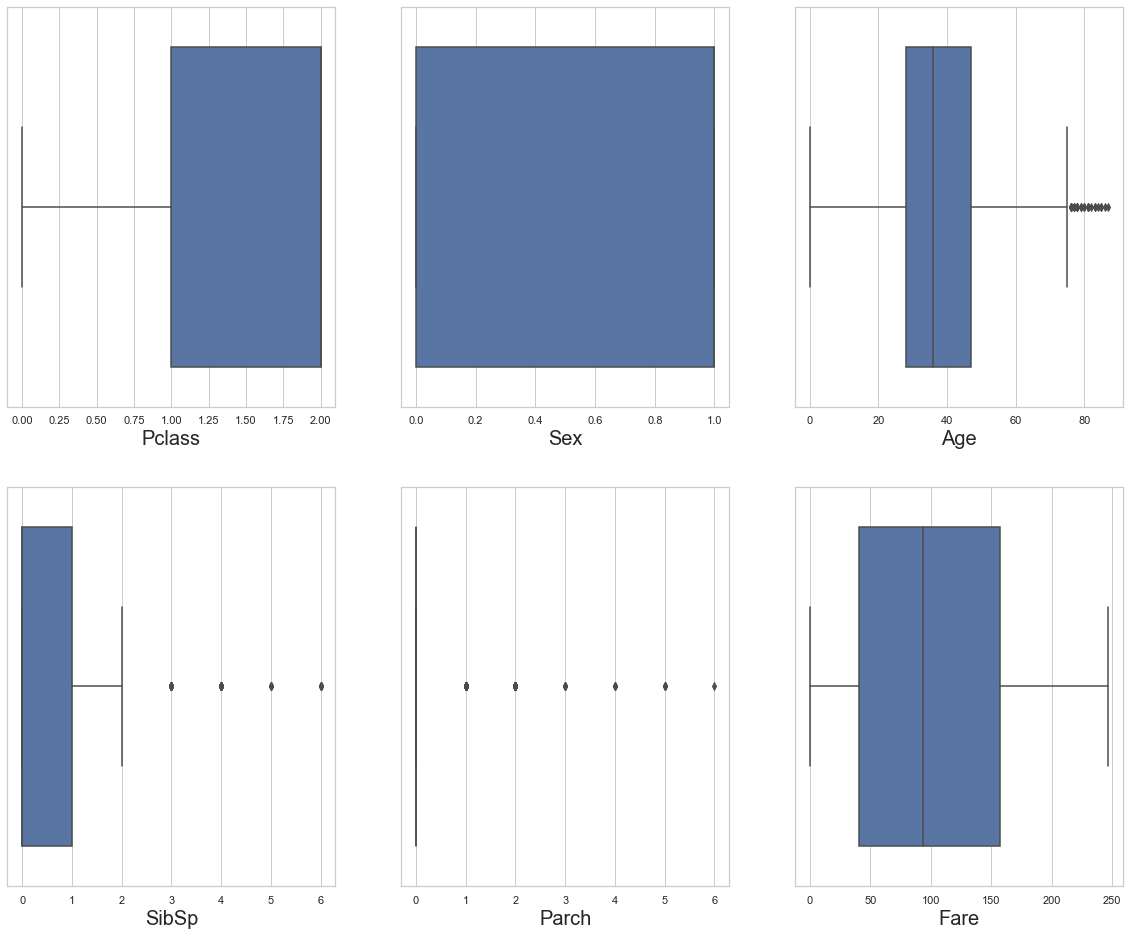

In [21]:
features = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
column=1
for column in df[features]:
    if plotnumber<=6:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Removing outlier


In [22]:
# Creating correlation matrix
cor = df.corr()
cor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.058003,-0.026385,0.081629,0.333943,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.346194,0.078141,0.018443,-0.724119,0.157112
Sex,-0.543351,0.131900,1.000000,0.075713,-0.123164,-0.245489,-0.265389,0.104057
Age,-0.058003,-0.346194,0.075713,1.000000,-0.245214,-0.158665,0.131373,-0.009510
SibSp,-0.026385,0.078141,-0.123164,-0.245214,1.000000,0.423338,0.368688,0.063983
Parch,0.081629,0.018443,-0.245489,-0.158665,0.423338,1.000000,0.361243,0.038322
Fare,0.333943,-0.724119,-0.265389,0.131373,0.368688,0.361243,1.000000,-0.152946
Embarked,-0.163517,0.157112,0.104057,-0.009510,0.063983,0.038322,-0.152946,1.000000


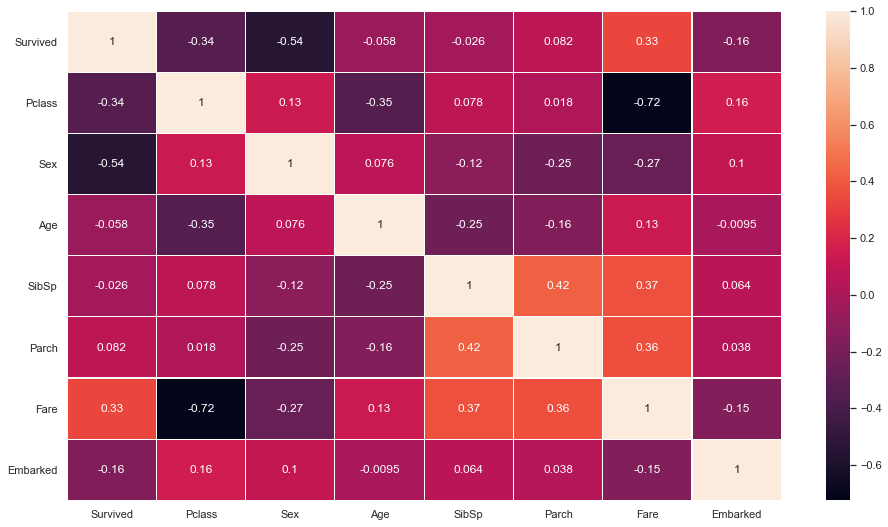

In [23]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);

In [24]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,51,1,0,207,0
2,1,2,0,34,0,0,41,2
3,1,0,0,47,1,0,189,2
4,0,2,1,47,0,0,43,2
...,...,...,...,...,...,...,...,...
886,0,1,1,35,0,0,85,2
887,1,0,0,24,0,0,153,2
888,0,2,0,36,1,2,131,2
889,1,0,1,34,0,0,153,0


In [25]:
df.shape

(891, 8)

In [26]:
df_new.shape

(846, 8)

In [27]:
# Let's check the the data loss
data_loss = (891-846)/891*100
data_loss

5.05050505050505

In [28]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [29]:
print(df_1.shape)
print(df)

(655, 8)
     Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0           0       2    1   28      1      0    18         2
1           1       0    0   51      1      0   207         0
2           1       2    0   34      0      0    41         2
3           1       0    0   47      1      0   189         2
4           0       2    1   47      0      0    43         2
..        ...     ...  ...  ...    ...    ...   ...       ...
886         0       1    1   35      0      0    85         2
887         1       0    0   24      0      0   153         2
888         0       2    0   36      1      2   131         2
889         1       0    1   34      0      0   153         0
890         0       2    1   42      0      0    30         1

[891 rows x 8 columns]


In [30]:
# Let's check the the data loss
data_loss = (891-655)/891*100
data_loss

26.487093153759822

In [31]:
df_new.skew()


Survived    0.426139
Pclass     -0.558458
Sex        -0.647065
Age         0.511080
SibSp       2.018553
Parch       2.044444
Fare        0.466345
Embarked   -1.194072
dtype: float64

# Removing skewness using yeo-johnson method

In [32]:
# Defining skewed columns 
features = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

In [33]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [34]:
df_new[features] = scaler.fit_transform(df_new[features].values)

In [35]:
df_new[features]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.885213,0.727899,-0.635957,1.550475,-0.497761,-1.388183,0.600141
1,-1.454164,-1.373817,0.784225,1.550475,-0.497761,1.330413,-1.737483
2,0.885213,-1.373817,-0.242180,-0.632635,-0.497761,-0.797920,0.600141
3,-1.454164,-1.373817,0.552380,1.550475,-0.497761,1.162622,0.600141
4,0.885213,0.727899,0.552380,-0.632635,-0.497761,-0.755982,0.600141
...,...,...,...,...,...,...,...
886,-0.466018,0.727899,-0.178447,-0.632635,-0.497761,-0.037865,0.600141
887,-1.454164,-1.373817,-0.911091,-0.632635,-0.497761,0.799677,0.600141
888,0.885213,-1.373817,-0.115202,1.550475,2.037331,0.555273,0.600141
889,-1.454164,0.727899,-0.242180,-0.632635,-0.497761,0.799677,-1.737483


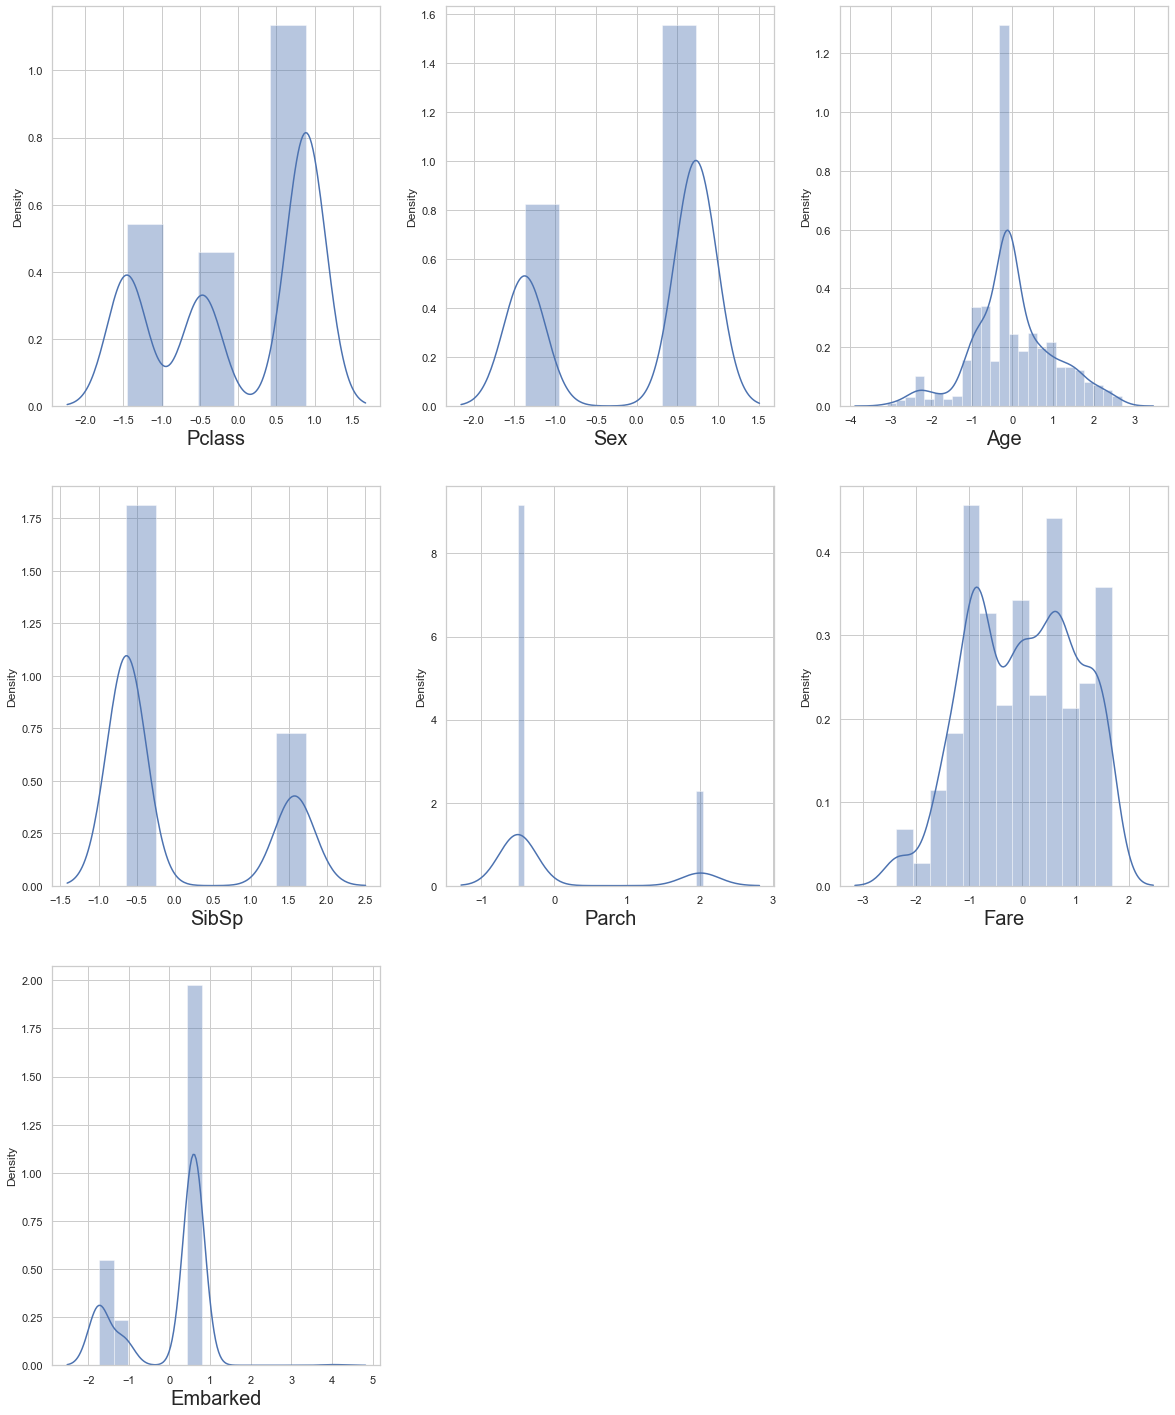

In [36]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [37]:
df_new.skew()

Survived    0.426139
Pclass     -0.435864
Sex        -0.647065
Age         0.060300
SibSp       0.952257
Parch       1.514142
Fare       -0.138136
Embarked   -0.846767
dtype: float64

Removing of 'Parch','Embarked' column skewness is more due to that column

In [40]:
df_new.drop(['Parch','Embarked'], axis=1, inplace=True)

In [41]:
df_new.skew()

Survived    0.426139
Pclass     -0.435864
Sex        -0.647065
Age         0.060300
SibSp       0.952257
Fare       -0.138136
dtype: float64

Skewness is almost removed

# Model Preparation

In [42]:
x = df_new.drop("Survived",axis=1)
y = df_new["Survived"]

In [43]:
x

,Pclass,Sex,Age,SibSp,Fare
0,0.885213,0.727899,-0.635957,1.550475,-1.388183
1,-1.454164,-1.373817,0.784225,1.550475,1.330413
2,0.885213,-1.373817,-0.242180,-0.632635,-0.797920
3,-1.454164,-1.373817,0.552380,1.550475,1.162622
4,0.885213,0.727899,0.552380,-0.632635,-0.755982
...,...,...,...,...,...
886,-0.466018,0.727899,-0.178447,-0.632635,-0.037865
887,-1.454164,-1.373817,-0.911091,-0.632635,0.799677
888,0.885213,-1.373817,-0.115202,1.550475,0.555273
889,-1.454164,0.727899,-0.242180,-0.632635,0.799677


In [44]:
y.value_counts()


0    511
1    335
Name: Survived, dtype: int64

The data is not balanced. Since we have class imbalancing issue in the dataset so we need to balance it. Here I am using oversampling method to balance the class.

In [45]:
x.shape, y.shape

((846, 5), (846,))

# Oversampling

In [46]:
# Balancing the data using oversampling
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [47]:
# Checking the value counts again
y.value_counts()

1    511
0    511
Name: Survived, dtype: int64

So we can observe clearly that the data is balanced in both the classes.

<AxesSubplot:xlabel='Survived', ylabel='count'>

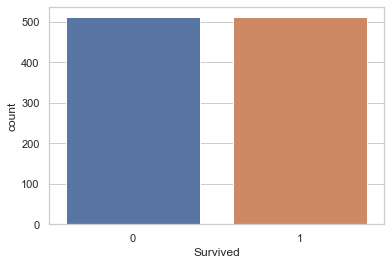

In [48]:
# Visualizing the data after oversampling
sns.countplot(y)

So by visualization we can see the data is balanced by increasing the number of survival rate.

# Scaling data using Min-Max Scaler

In [49]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

In [50]:
from sklearn.model_selection  import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [51]:
lg=LogisticRegression()

In [52]:
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    pred_train=lg.predict(x_train)
    if round(accuracy_score(y_test,pred_test)*100,1)==round(accuracy_score(y_train,pred_train)*100,1):
        print('Random state',i,'score is well')
        print('test score',accuracy_score(y_test,pred_test)*100)
        print('train score',accuracy_score(y_train,pred_train)*100)

Random state 95 score is well
test score 79.15309446254072
train score 79.16083916083916


# Training and Test Data

In [53]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [54]:
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
nb=MultinomialNB()

In [55]:
param={'kernel':['linear','rbf','poly','sigmoid']}
gd=GridSearchCV(svc,param,cv=5)
gd.fit(x,y)
print(gd.best_params_)

{'kernel': 'rbf'}


In [56]:
param={'criterion':['ginny','entropy'],'splitter':['best','random'],'max_features':['none','auto','sqrt','log2']}
gd=GridSearchCV(dtc,param)
gd.fit(x,y)
print(gd.best_params_)

{'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}


In [57]:
param={'n_neighbors':[7,5,11],'weights':['uniform','distance'],'algorithm':['auto','bell_tree','kd_tree','brute']}
gd=GridSearchCV(knn,param)
gd.fit(x,y)
print(gd.best_params_)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


In [58]:
lr = LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [59]:
svc=SVC(kernel='rbf')
dtc=DecisionTreeClassifier(criterion='entropy',max_features='sqrt',splitter='best')
knn=KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='auto')
nb=MultinomialNB()

In [60]:
rf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
rf.fit(x,y)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [61]:
trcf_model=RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }

In [62]:
trcf_model = RandomizedSearchCV(trcf_model, tuned_parameters,cv=10,scoring='accuracy',n_iter=20)
trcf_model.fit(x,y)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(10, 100, 10),
                                        'n_estimators': range(10, 100, 10)},
                   scoring='accuracy')

In [63]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Accuracy Score',accuracy_score(y_test,pred))
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
    print('Classification Report\n',classification_report(y_test,pred))
    print('F1 score',f1_score(y_test,pred))

In [64]:

fun(svc)

Accuracy Score 0.7947882736156352
Confusion Matrix
 [[130  26]
 [ 37 114]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       156
           1       0.81      0.75      0.78       151

    accuracy                           0.79       307
   macro avg       0.80      0.79      0.79       307
weighted avg       0.80      0.79      0.79       307

F1 score 0.7835051546391752


In [65]:
fun(dtc)

Accuracy Score 0.7785016286644951
Confusion Matrix
 [[127  29]
 [ 39 112]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       156
           1       0.79      0.74      0.77       151

    accuracy                           0.78       307
   macro avg       0.78      0.78      0.78       307
weighted avg       0.78      0.78      0.78       307

F1 score 0.767123287671233


In [66]:

fun(lr)

Accuracy Score 0.8273615635179153
Confusion Matrix
 [[137  19]
 [ 34 117]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       156
           1       0.86      0.77      0.82       151

    accuracy                           0.83       307
   macro avg       0.83      0.83      0.83       307
weighted avg       0.83      0.83      0.83       307

F1 score 0.8153310104529616


In [67]:

fun(knn)

Accuracy Score 0.8241042345276873
Confusion Matrix
 [[130  26]
 [ 28 123]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       156
           1       0.83      0.81      0.82       151

    accuracy                           0.82       307
   macro avg       0.82      0.82      0.82       307
weighted avg       0.82      0.82      0.82       307

F1 score 0.8200000000000002


In [68]:
fun(nb)

Accuracy Score 0.7296416938110749
Confusion Matrix
 [[123  33]
 [ 50 101]]
Classification Report
               precision    recall  f1-score   support

           0       0.71      0.79      0.75       156
           1       0.75      0.67      0.71       151

    accuracy                           0.73       307
   macro avg       0.73      0.73      0.73       307
weighted avg       0.73      0.73      0.73       307

F1 score 0.7087719298245615


In [69]:
fun(lg)

Accuracy Score 0.8273615635179153
Confusion Matrix
 [[137  19]
 [ 34 117]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       156
           1       0.86      0.77      0.82       151

    accuracy                           0.83       307
   macro avg       0.83      0.83      0.83       307
weighted avg       0.83      0.83      0.83       307

F1 score 0.8153310104529616


In [70]:
fun(rf)

Accuracy Score 0.8241042345276873
Confusion Matrix
 [[136  20]
 [ 34 117]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       156
           1       0.85      0.77      0.81       151

    accuracy                           0.82       307
   macro avg       0.83      0.82      0.82       307
weighted avg       0.83      0.82      0.82       307

F1 score 0.8125


In [71]:
fun(trcf_model)

Accuracy Score 0.7915309446254072
Confusion Matrix
 [[127  29]
 [ 35 116]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.81      0.80       156
           1       0.80      0.77      0.78       151

    accuracy                           0.79       307
   macro avg       0.79      0.79      0.79       307
weighted avg       0.79      0.79      0.79       307

F1 score 0.7837837837837838


In [72]:
from sklearn.model_selection import cross_val_score


In [73]:
print("K-Neighbors Classifier:",cross_val_score(knn,x,y,cv=5).mean())
print("Logistic Regression:",cross_val_score(lr,x,y,cv=5).mean())
print("Decision Tree Classifier:",cross_val_score(trcf_model,x,y,cv=5).mean())
print("Support Vector Classifier:",cross_val_score(svc,x,y,cv=5).mean())
print("Random Forest Classifier:",cross_val_score(rf,x,y,cv=5).mean())
print("Tuened Random Forest Classifier:",cross_val_score(trcf_model,x,y,cv=5).mean())
print("multinomial Naive Bayes classifier:",cross_val_score(nb,x,y,cv=5).mean())

K-Neighbors Classifier: 0.824882831181253
Logistic Regression: 0.7906217120994741
Decision Tree Classifier: 0.8043185078909613
Support Vector Classifier: 0.7955045432807271
Random Forest Classifier: 0.8229459588713535
Tuened Random Forest Classifier: 0.7984505021520805
multinomial Naive Bayes classifier: 0.7426972740315638


# Plot the ROC Curves for comparision

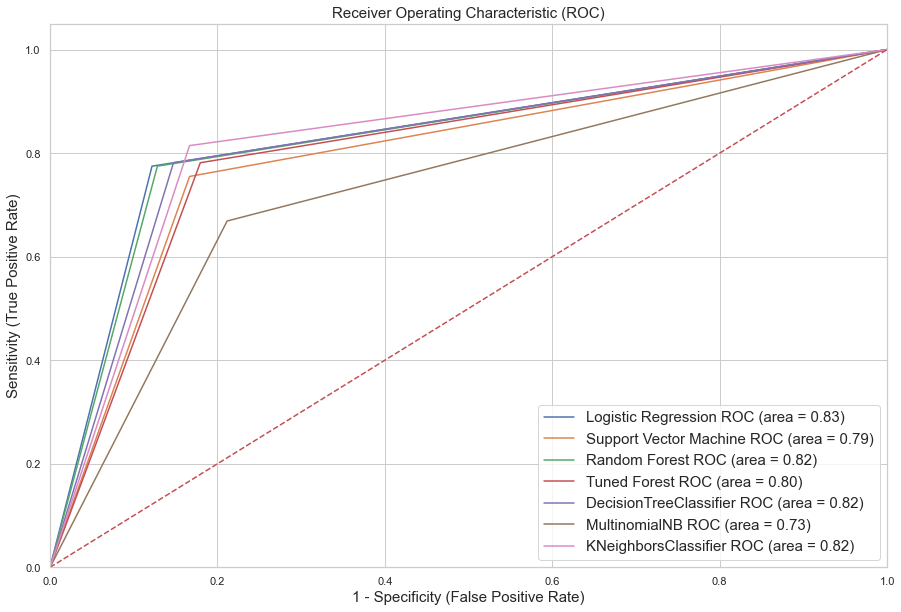

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
plt.figure(figsize=(15,10))
models = [
{
    'label': 'Logistic Regression',
    'model': lr,
},
{
    'label': 'Support Vector Machine',
    'model': svc,
},
{
    'label': 'Random Forest',
    'model': rf,
},
{
    'label': 'Tuned Forest', 
    'model': trcf_model,
},
{
    'label': 'DecisionTreeClassifier',
    'model': dtc,
},   
{
    'label': 'MultinomialNB',
    'model': nb,
},
{
    'label': 'KNeighborsClassifier',
    'model': knn,
}
]

for m in models:
    model = m['model'] 
    model.fit(x_train, y_train) 
    y_pred=model.predict(x_test)
    fpr,tpr,thersholds=roc_curve(y_test,y_pred)
    auc=roc_auc_score(y_test,y_pred)
    plt.plot(fpr, tpr,label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=15)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=15)
plt.legend(loc="lower right", fontsize=15)

# Hyper parameter tuning

In [75]:
from sklearn.model_selection import GridSearchCV
param={'n_neighbors':[7,5,11],'weights':['uniform','distance'],'algorithm':['auto','bell_tree','kd_tree','brute']}


In [76]:
gd=GridSearchCV(knn,param)
gd.fit(x,y)
print(gd.best_params_)


{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}


In [81]:
Final_mod_knn=KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='auto')

In [82]:
fun(Final_mod_knn)

Accuracy Score 0.8241042345276873
Confusion Matrix
 [[130  26]
 [ 28 123]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       156
           1       0.83      0.81      0.82       151

    accuracy                           0.82       307
   macro avg       0.82      0.82      0.82       307
weighted avg       0.82      0.82      0.82       307

F1 score 0.8200000000000002


# # Model Saving

KNeighborsClassifier   is giving best results compare to others so we will create model using Final_mod_knn. 

In [83]:
import pickle
filename='TitanicPredict.pkl'
pickle.dump(Final_mod_knn,open(filename,'wb'))

     Actual  Predict
383       0        0
776       0        0
792       0        0
131       0        1
464       0        0
..      ...      ...
542       1        1
675       1        1
756       0        0
625       0        0
397       0        0

[307 rows x 2 columns]


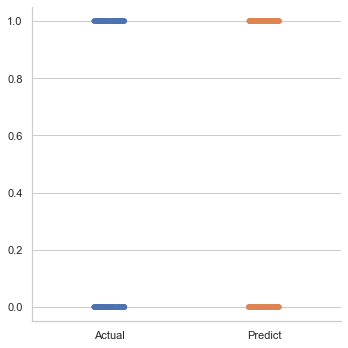

In [84]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=Final_mod_knn.predict(x_test)

print(res)
sns.catplot(data=res)